In [24]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from plotnine import  * 

In [3]:
data = pd.read_csv('../data/KelleyBlueBookData.csv')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [9]:
full_model = smf.ols('Price ~ Mileage + Liter + Cylinder', data=data).fit()
reduced_model = smf.ols('Price ~ Mileage + Liter', data=data).fit()
anova = sm.stats.anova_lm(reduced_model, full_model)
anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,801.0,5.263755e+10,0.0,NaN,NaN,NaN
1,800.0,5.160560e+10,1.0,1.031948e+09,15.997457,0.000069


In [10]:
sse_0 = sum(reduced_model.resid**2)
df_sse_0 = reduced_model.df_resid
sse_0, df_sse_0

(52637552166.23585, 801.0)

In [11]:
sse_1 = sum(full_model.resid**2)
df_sse_1 = full_model.df_resid
sse_1, df_sse_1

(51605604120.22623, 800.0)

In [12]:
f = ((sse_0-sse_1)/(df_sse_0-df_sse_1))/(sse_1/df_sse_1)
f

15.99745707625828

In [13]:
sm.stats.anova_lm(full_model, typ=2) 

,sum_sq,df,F,PR(>F)
Mileage,1.283997e+09,1.0,19.904763,0.000009
Liter,1.929760e+08,1.0,2.991552,0.084086
Cylinder,1.031948e+09,1.0,15.997457,0.000069
Residual,5.160560e+10,800.0,NaN,NaN


In [14]:
sm.stats.anova_lm(full_model, typ=1) 

,df,sum_sq,mean_sq,F,PR(>F)
Mileage,1.0,1.605590e+09,1.605590e+09,24.890171,7.448191e-07
Liter,1.0,2.421824e+10,2.421824e+10,375.435819,7.134623e-69
Cylinder,1.0,1.031948e+09,1.031948e+09,15.997457,6.930502e-05
Residual,800.0,5.160560e+10,6.450701e+07,NaN,NaN


In [15]:
reduced_mileage = smf.ols('Price ~ Liter + Cylinder', data=data).fit()
sse_0_mileage = sum(reduced_mileage.resid**2)
df_sse_0_mileage = reduced_mileage.df_resid
sse_0_mileage, df_sse_0_mileage

(52889600780.65453, 801.0)

In [16]:
f_mileage = ((sse_0_mileage-sse_1)/(df_sse_0_mileage-df_sse_1))/(sse_1/df_sse_1)
f_mileage

19.904763171642575

In [17]:
reg1 = smf.ols('Price ~ Mileage + Cylinder', data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     206.2
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           5.95e-73
Time:                        18:01:46   Log-Likelihood:                -8369.2
No. Observations:                 804   AIC:                         1.674e+04
Df Residuals:                     801   BIC:                         1.676e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3145.7503   1325.934      2.372      0.018     543.034    5748.467
Mileage       -0.1524      0.035     -4.401      0.000      -0.220      -0.084
Cylinder    4027.6746    204.612     19.684      0.000    3626.036    4429.313
==============================================================================
Omnibus:                      198.944   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.493
Skew:                           1.439   Prob(JB):                     1.96e-84
Kurtosis:                       4.797   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
sse = sum(reg1.resid**2)
sst = sum((data['Price'] - data['Price'].mean())**2)
sst

78461382864.00787

In [21]:
r_squared = 1 - sse/sst
r_squared_adj = 1 - (sse/reg1.df_resid)/(sst/(804-1))
r_squared, r_squared_adj

(0.33982070826263044, 0.33817232051796786)

In [22]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     138.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           2.18e-72
Time:                        18:16:44   Log-Likelihood:                -8367.7
No. Observations:                 804   AIC:                         1.674e+04
Df Residuals:                     800   BIC:                         1.676e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4707.6150   1602.866      2.937      0.003    1561.296    7853.934
Mileage       -0.1544      0.035     -4.461      0.000      -0.222      -0.086
Liter       1545.2522    893.411      1.730      0.084    -208.454    3298.958
Cylinder    2847.9345    712.040      4.000      0.000    1450.247    4245.622
==============================================================================
Omnibus:                      214.158   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.825
Skew:                           1.499   Prob(JB):                     2.56e-97
Kurtosis:                       5.071   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
anova2 = sm.stats.anova_lm(reg1, full_model)
anova2

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,801.0,5.179858e+10,0.0,NaN,NaN,NaN
1,800.0,5.160560e+10,1.0,1.929760e+08,2.991552,0.084086


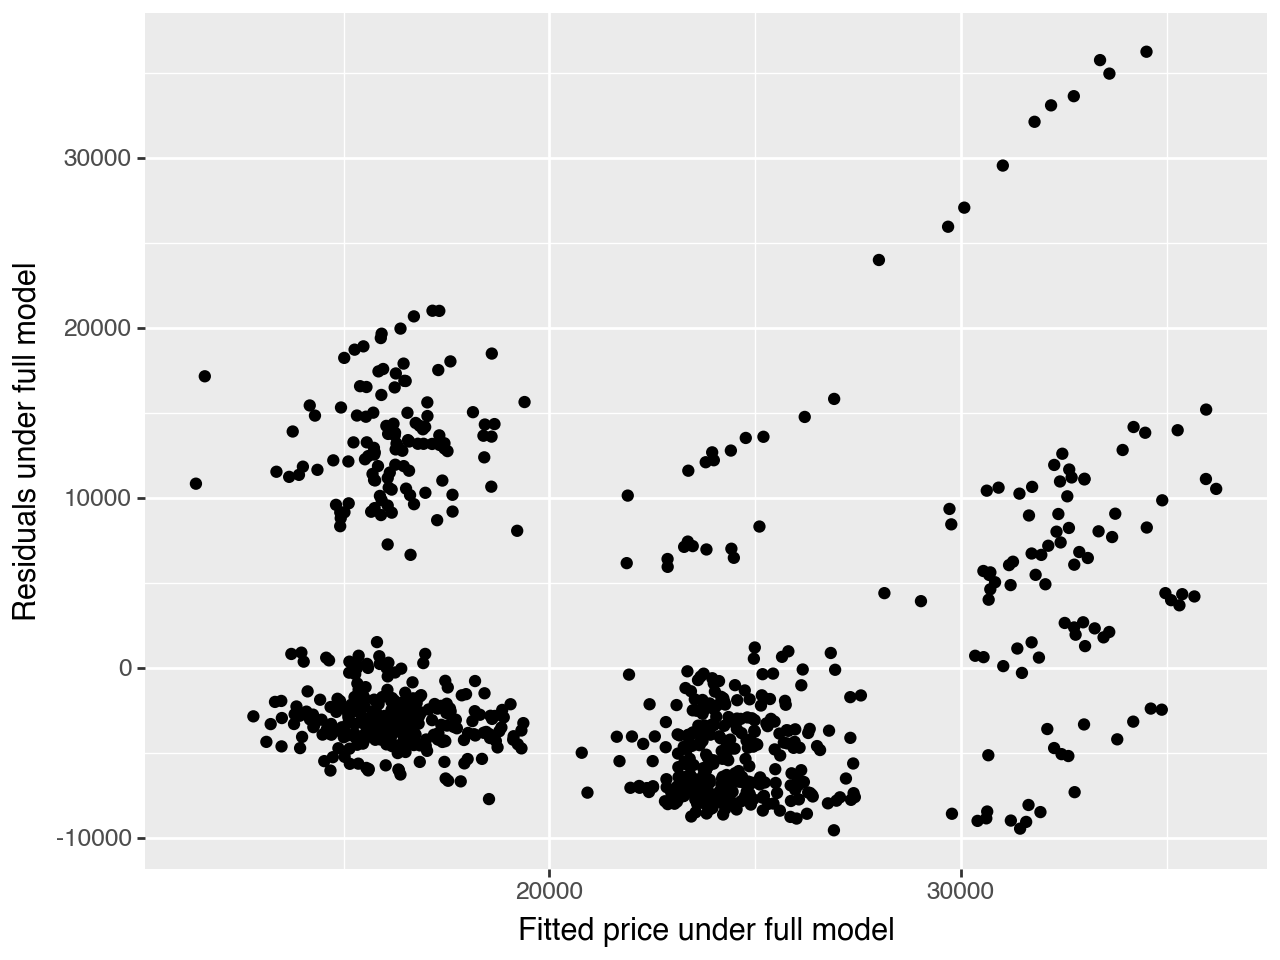

In [25]:
data['predicted_full'] = full_model.fittedvalues
data['residuals_full'] = full_model.resid
plot_resid_full = (
    ggplot(data, aes(x='predicted_full', y='residuals_full')) +
    geom_point() +
    labs( x='Fitted price under full model', y='Residuals under full model')
)
plot_resid_full